In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:

df = pd.read_excel(r"C:\Users\Tetiana\Documents\ironhack\lab\House-Price-Prediction\regression_data.xls")
df 

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
df.shape

(21597, 21)

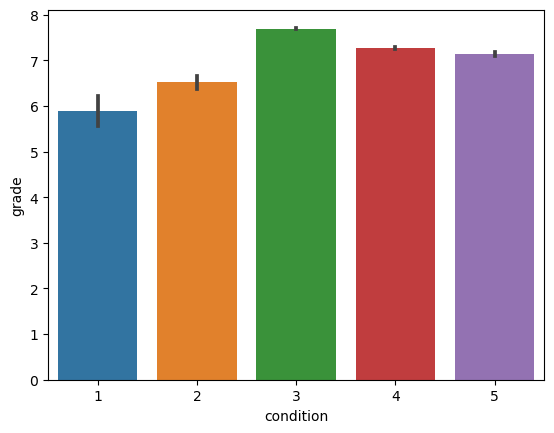

In [54]:
sns.barplot(x=df['condition'], y=df['grade'])
plt.show()

In [4]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [5]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,2014-10-29 04:20:38.171968512,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,...,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
min,1.000102e+06,2014-05-02 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,2014-07-22 00:00:00,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,2014-10-16 00:00:00,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,2015-02-17 00:00:00,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,2015-05-27 00:00:00,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06
std,2.876736e+09,NaN,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,...,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05


In [9]:
numerical = df.select_dtypes('number')
numerical

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


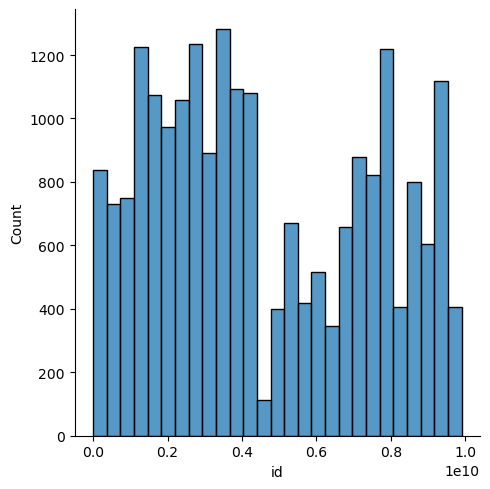

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


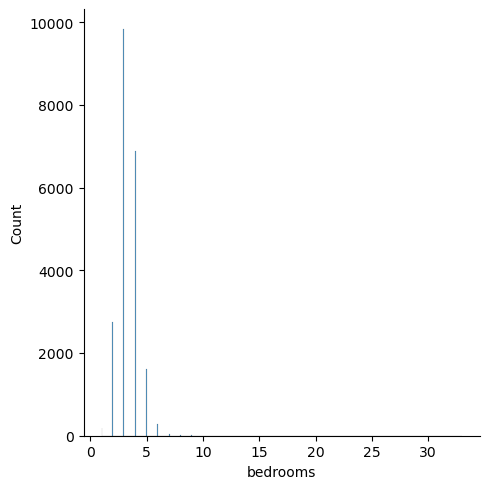

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


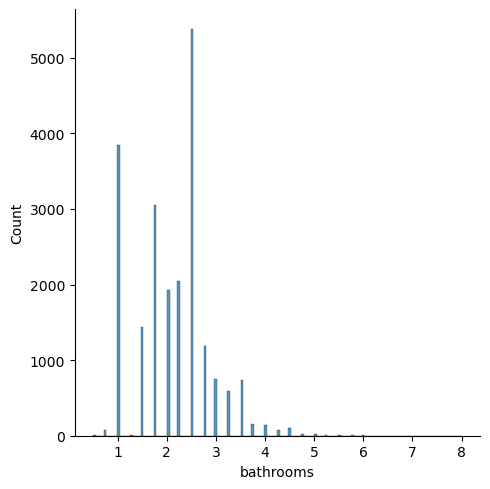

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


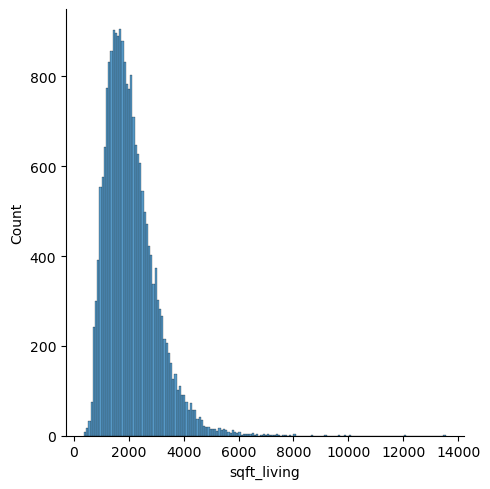

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


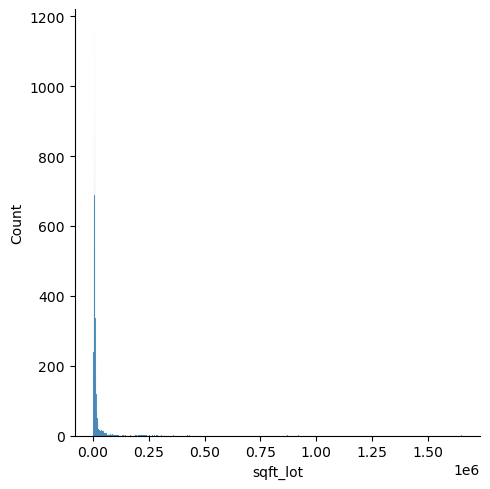

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


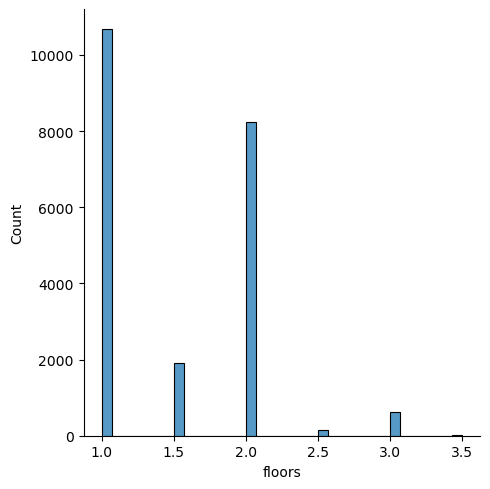

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


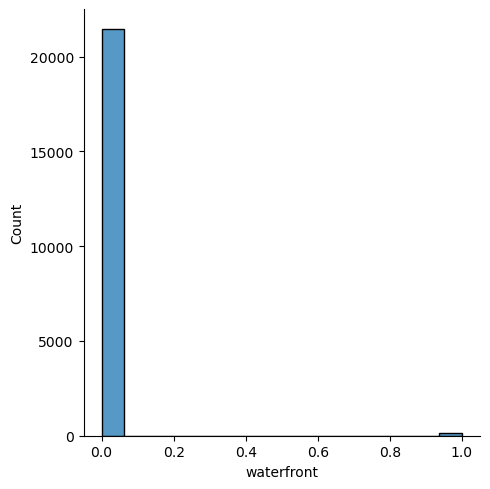

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


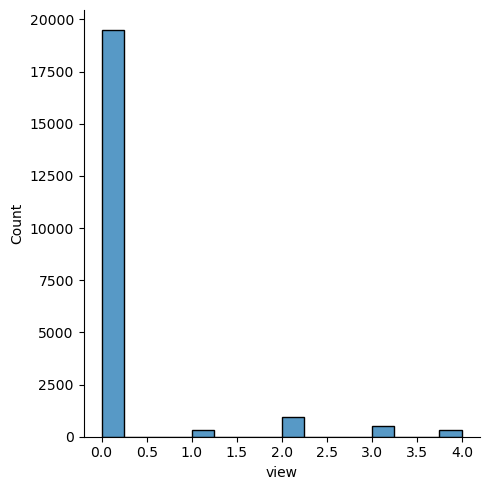

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


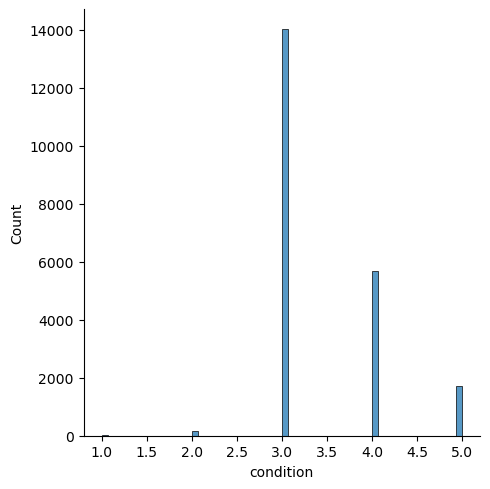

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


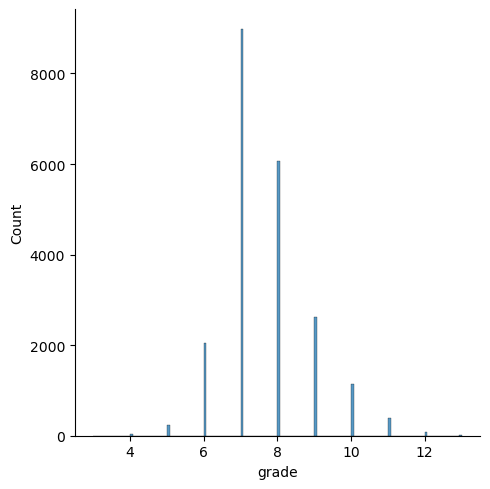

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


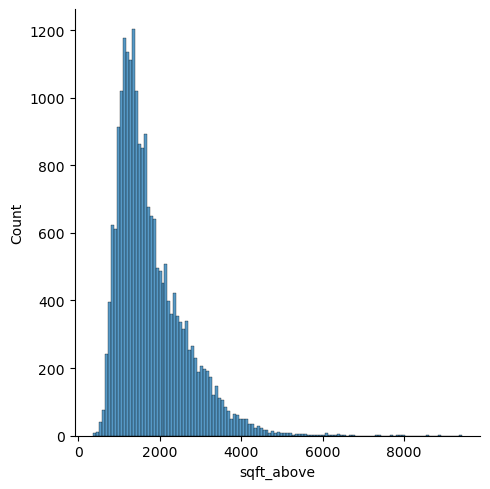

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


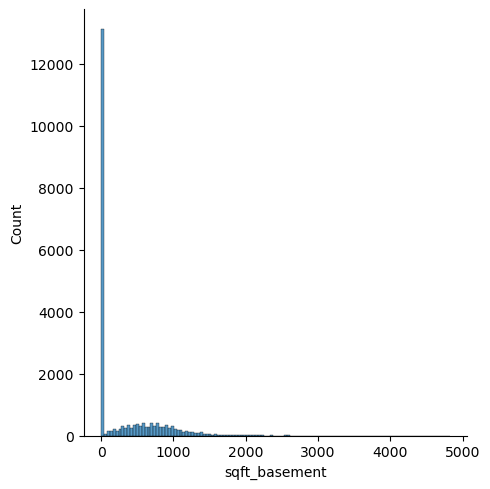

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


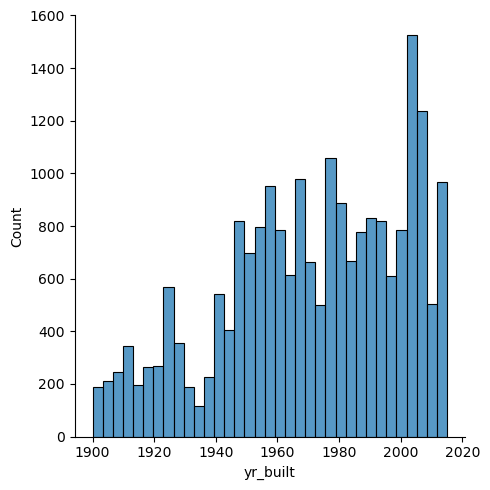

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


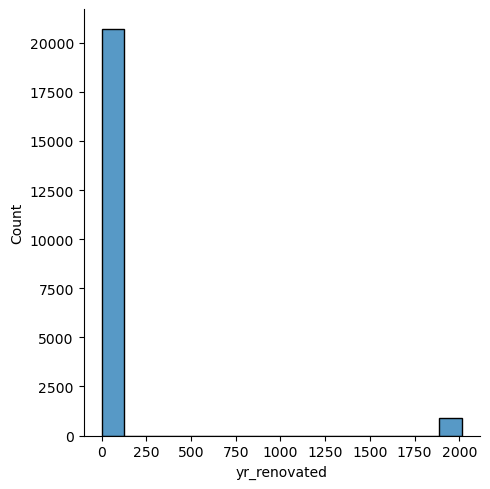

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


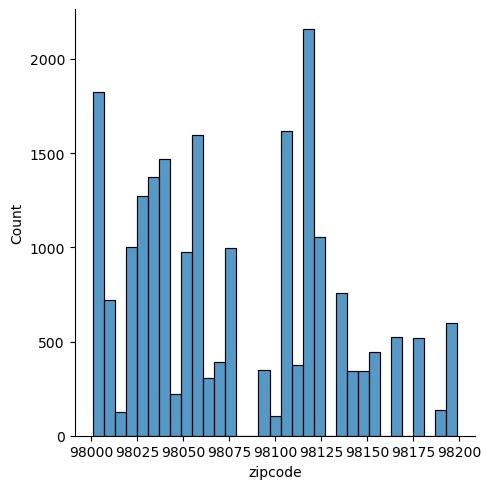

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


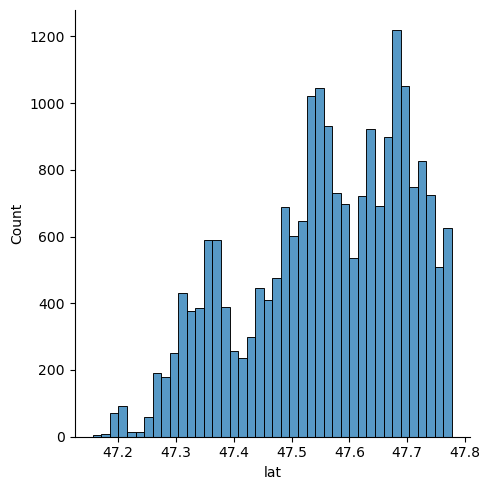

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


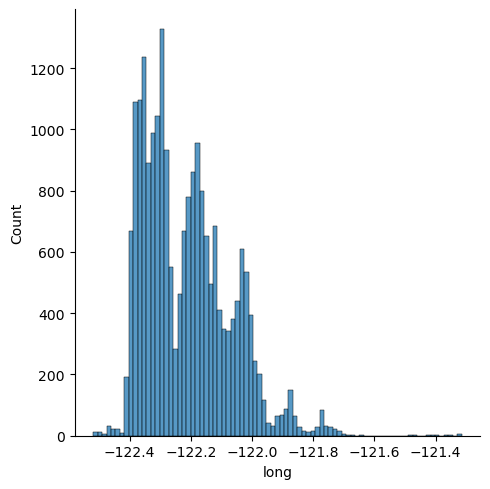

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


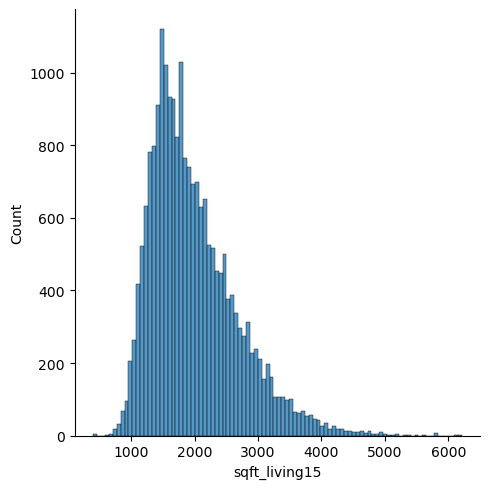

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


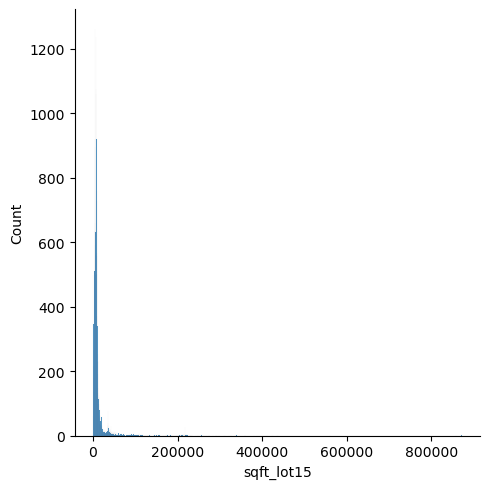

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


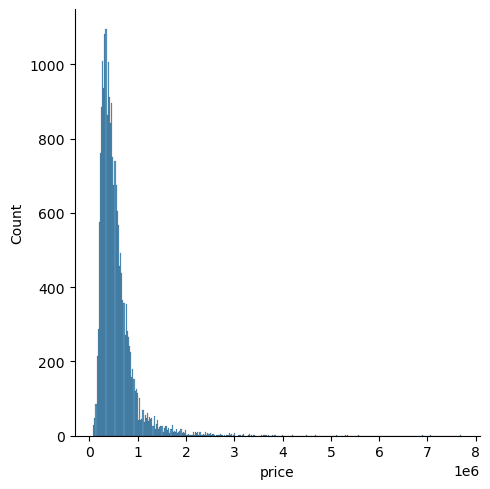

In [12]:
for val in numerical.columns:
    sns.displot(numerical[val])
    plt.show()

In [13]:
for column in numerical.columns:
    print(numerical[column].value_counts())


id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64
sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: count, Length: 1034, dtype: int64
sqft_lot
5000   

In [10]:
IQR = abs(np.quantile(df["price"], .25) - np.quantile(df["price"], .75)) * 1.5
lower_boundary = np.quantile(df["price"], .25) - IQR
upper_boundary = np.quantile(df["price"], .75) + IQR
lower_boundary, upper_boundary


(-162500.0, 1129500.0)

In [11]:
df[(df["price"] >1129500.0) | (df["price"] < -162500.0)].sort_values("price")

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3101,6613000015,2014-12-23,4,3.00,3180,4649,2.0,0,0,4,...,2070,1110,1925,0,98105,47.6583,-122.273,2720,5980,1130000
7674,9286000150,2015-03-30,6,4.00,5330,18116,2.0,0,0,3,...,3950,1380,2000,0,98006,47.5503,-122.137,4590,16900,1130000
2444,7856640560,2014-06-04,5,3.50,3880,13885,2.0,0,3,4,...,2540,1340,1979,0,98006,47.5696,-122.156,3690,13885,1130000
13280,5015001215,2015-04-23,4,3.50,3170,4000,2.0,0,0,3,...,2340,830,1999,0,98112,47.6265,-122.298,1770,4000,1130000
1372,6117500320,2014-07-08,3,2.25,2790,13791,1.0,0,3,3,...,2790,0,2006,0,98166,47.4389,-122.351,2720,12600,1130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,2015-04-13,5,5.00,8000,23985,2.0,0,4,3,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
4407,2470100110,2014-08-04,5,5.75,9200,35069,2.0,0,0,3,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
9245,9208900037,2014-09-19,6,7.75,9890,31374,2.0,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
3910,9808700762,2014-06-11,5,4.50,10040,37325,2.0,1,2,3,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000


In [12]:
outliers_indices = df[(df["price"] > 1129500.0) | (df["price"] < -162500.0)].index
df = df.drop(outliers_indices)



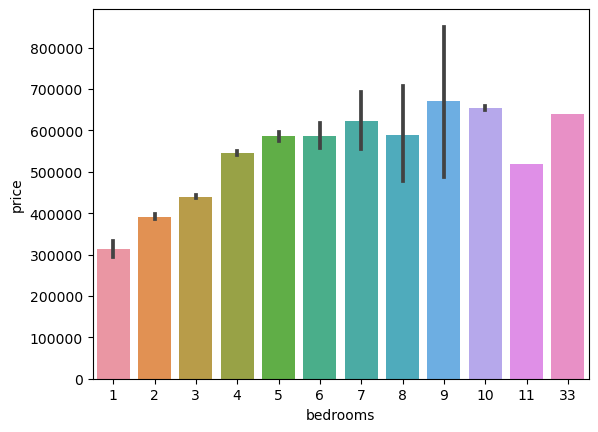

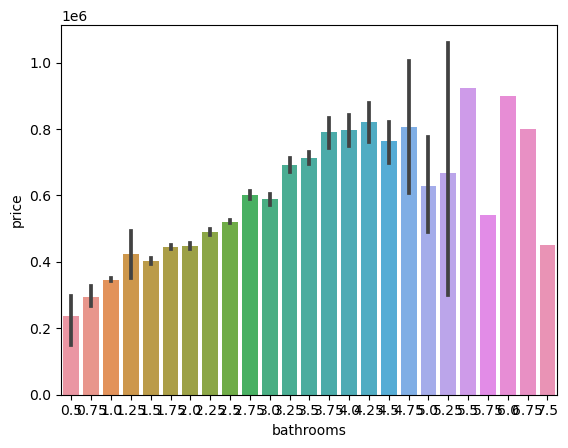

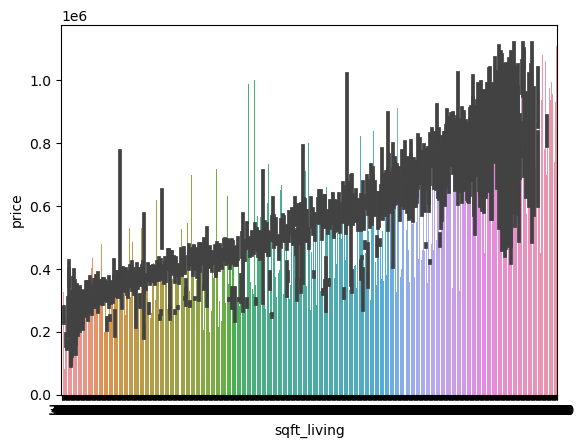

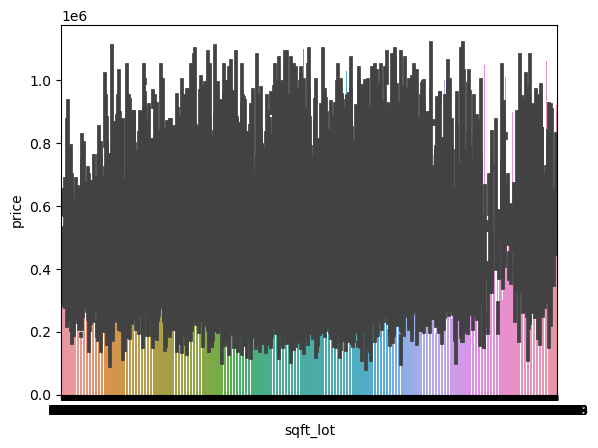

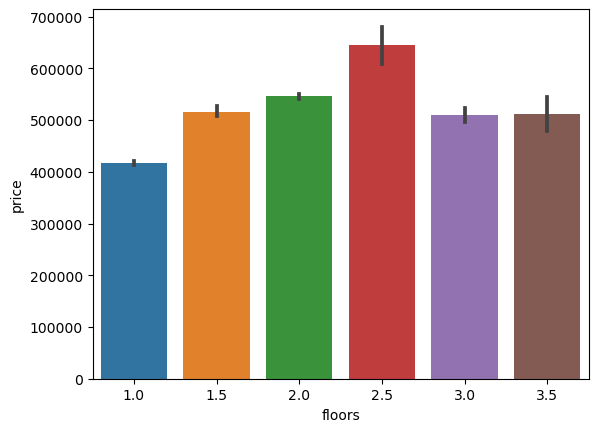

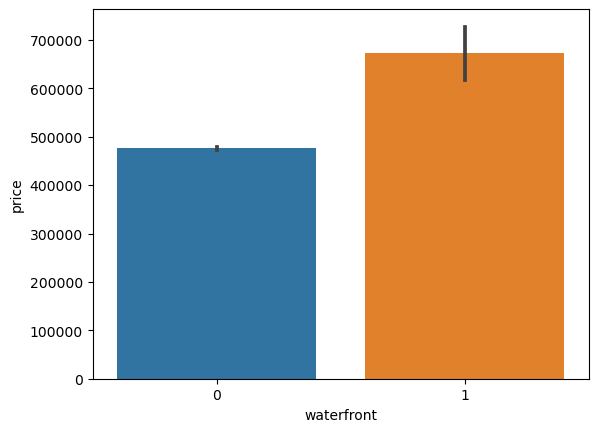

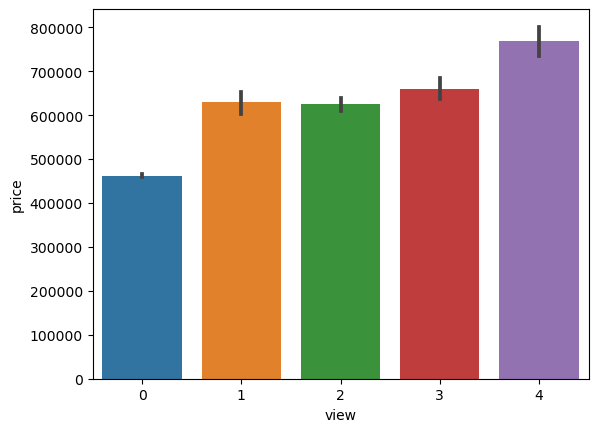

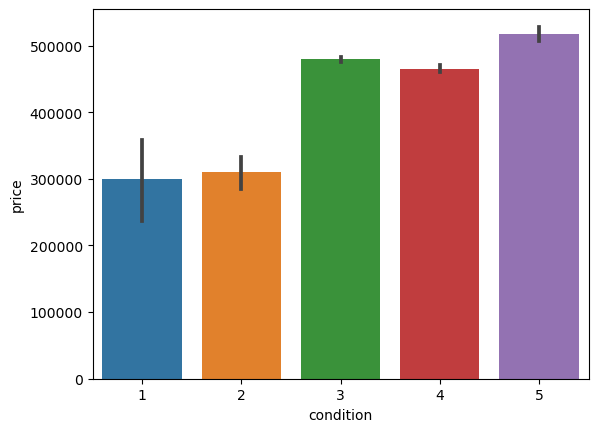

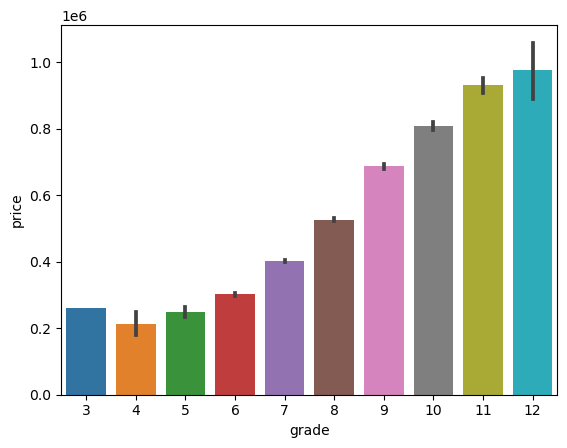

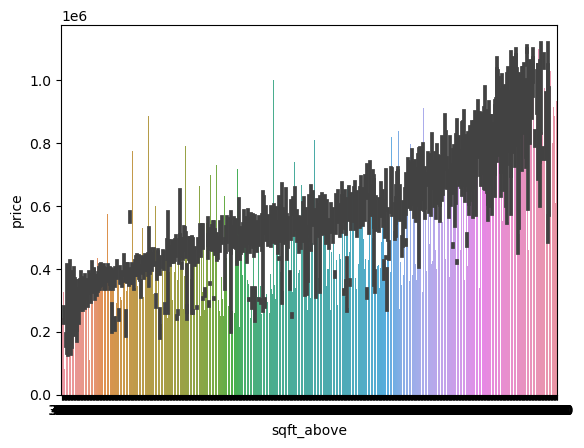

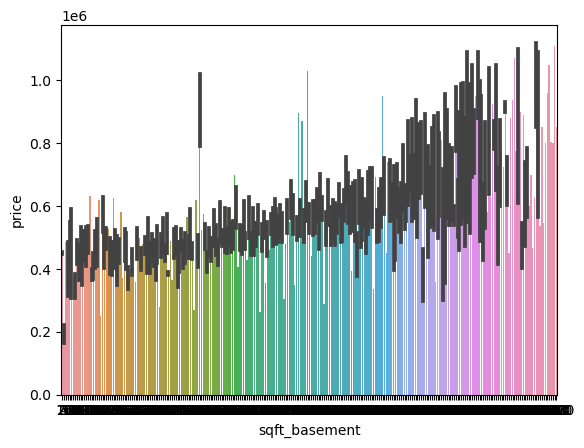

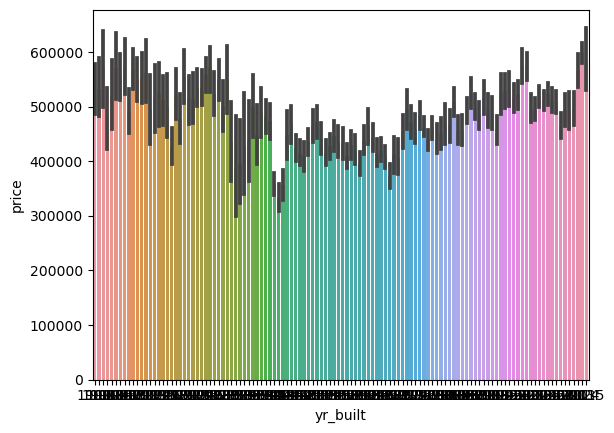

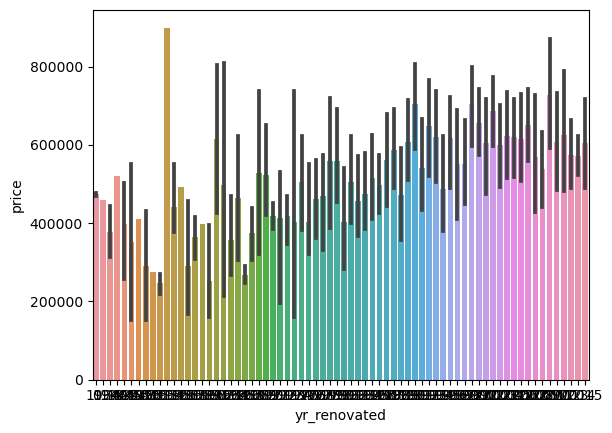

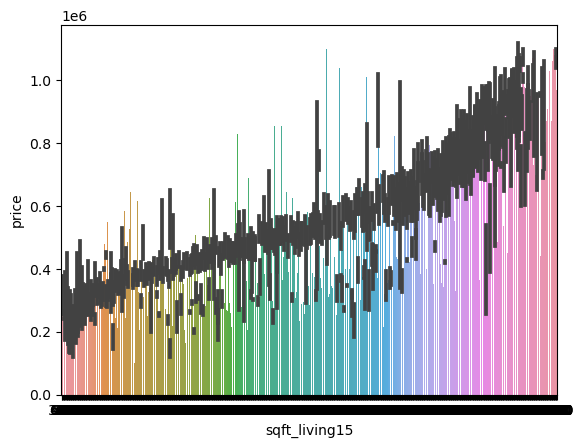

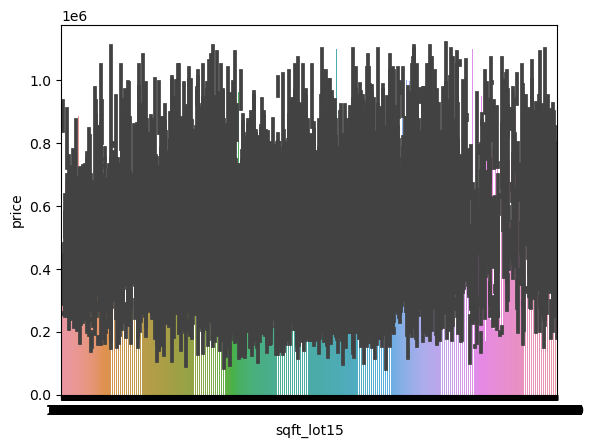

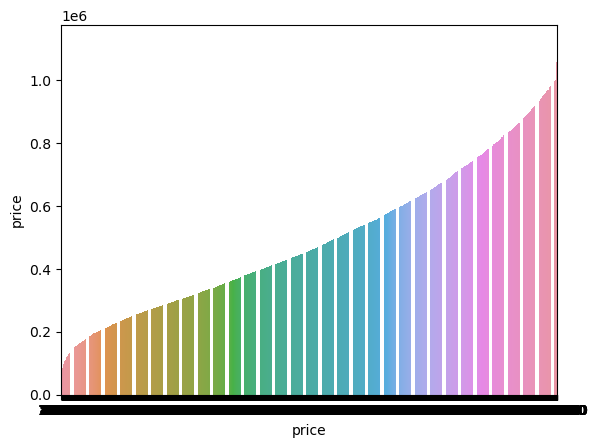

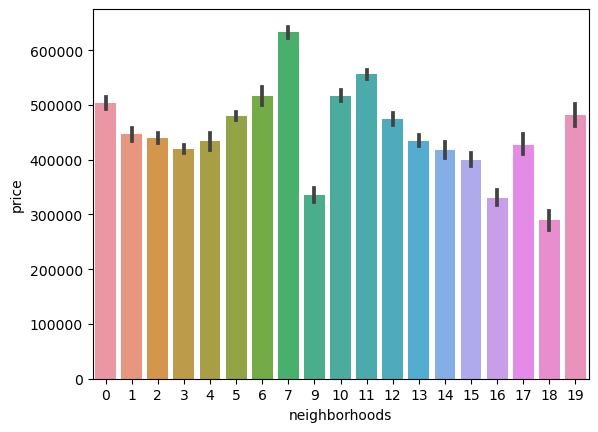

In [39]:
for col in df.select_dtypes('number'):
    sns.barplot(x=df[col], y=df['price'])
    plt.show()

In [19]:
'''df['neighborhoods'] = df['zipcode'].apply(lambda x: str(x)[:4])

#Checking the unique values of the column to see if the grouping was successful
df['neighborhoods'].unique()

#Changing the value names of the neighborhoods to make it easier to understand using only the last two digits
for val in df['neighborhoods'].unique():
    df['neighborhoods'] = df['neighborhoods'].replace(val, str(val)[2:])

#Converting the column to int
df['neighborhoods'] = df['neighborhoods'].astype(int)
df['neighborhoods'].value_counts()'''

neighborhoods
5     2518
11    2235
3     2139
0     1952
2     1791
10    1723
7     1321
12    1026
4      930
13     750
14     659
1      606
19     551
16     516
17     492
15     440
9      351
6      303
18     136
Name: count, dtype: int64

In [41]:
'''def categorize_zipcodes(latitudes, longitudes):
    city_center_lat = 47.6062  # Latitude of downtown Seattle
    city_center_long = -122.3321  # Longitude of downtown Seattle
    
    # Define the boundaries for city center and suburb
    city_center_range = 0.1  # Adjust this value based on the desired radius around downtown
    suburb_range = 0.5  # Adjust this value based on the desired distance from downtown
    
    categories = []
    for lat, long in zip(latitudes, longitudes):
        # Calculate distances from downtown Seattle
        distance_from_center = ((lat - city_center_lat) ** 2 + (long - city_center_long) ** 2) ** 0.5

        if distance_from_center <= city_center_range:
            categories.append('City Center')
        elif distance_from_center <= suburb_range:
            categories.append('Suburb')
        else:
            categories.append('Outskirts')
    
    return categories

# Apply the categorization function to the latitude and longitude columns
zipcodes_categories = categorize_zipcodes(df['lat'], df['long'])
df['zipcodes_categories'] = zipcodes_categories
df['zipcodes_categories'].value_counts()'''

KeyError: 'lat'

In [21]:
df.shape

(20439, 23)

In [22]:
df['price'].value_counts()

price
350000    172
450000    172
550000    159
500000    152
425000    150
         ... 
406550      1
278800      1
439888      1
354901      1
402101      1
Name: count, Length: 3440, dtype: int64

<Axes: >

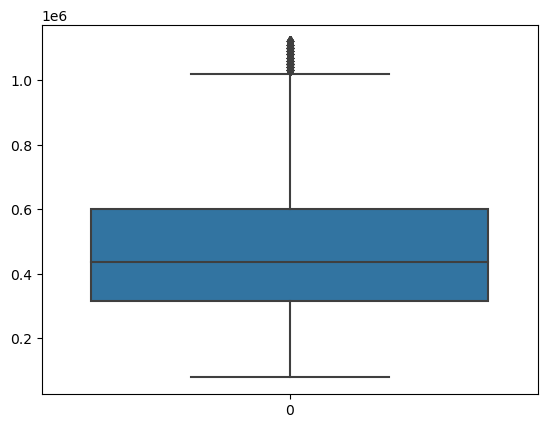

In [23]:
sns.boxplot(df['price'])

In [13]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [14]:
df = df.drop(columns=['id','date'])
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [26]:
df.dtypes

bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
waterfront               int64
view                     int64
condition                int64
grade                    int64
sqft_above               int64
sqft_basement            int64
yr_built                 int64
yr_renovated             int64
sqft_living15            int64
sqft_lot15               int64
price                    int64
neighborhoods            int32
zipcodes_categories     object
dtype: object

In [27]:
'''import pandas as pd

# Assuming 'data' is your DataFrame containing the house price data
# Convert 'zipcode' column to categorical data type

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['zipcodes_categories'], drop_first=True)'''


In [73]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [15]:
correlations_matrix = df.corr()
correlations_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.490657,0.584802,0.024595,0.155140,-0.030801,0.037750,0.024697,0.319519,0.463983,0.281912,0.161050,0.003830,-0.148499,-0.029801,0.140225,0.371324,0.021835,0.294144
bathrooms,0.490657,1.000000,0.716700,0.064993,0.502707,-0.003682,0.096525,-0.137200,0.613962,0.638466,0.221314,0.544843,0.025706,-0.206867,-0.008878,0.248774,0.528951,0.065192,0.454959
sqft_living,0.584802,0.716700,1.000000,0.159058,0.340518,0.001874,0.167816,-0.073201,0.705223,0.853404,0.375367,0.354009,0.021014,-0.204303,0.011149,0.286600,0.738126,0.173137,0.621362
sqft_lot,0.024595,0.064993,0.159058,1.000000,-0.017066,0.024878,0.079233,-0.002831,0.094244,0.162765,0.011650,0.042480,0.010852,-0.129916,-0.094700,0.222356,0.143315,0.709214,0.093554
floors,0.155140,0.502707,0.340518,-0.017066,1.000000,-0.001687,-0.013606,-0.278308,0.457583,0.528746,-0.295650,0.511811,-0.002475,-0.064801,0.036250,0.135760,0.268622,-0.021290,0.273360
waterfront,-0.030801,-0.003682,0.001874,0.024878,-0.001687,1.000000,0.295012,0.014135,-0.013306,-0.005480,0.013291,-0.038977,0.059720,0.044164,-0.045950,-0.059116,0.004515,0.031235,0.051724
view,0.037750,0.096525,0.167816,0.079233,-0.013606,0.295012,1.000000,0.034632,0.131985,0.066527,0.199357,-0.066452,0.063125,0.100744,-0.027729,-0.076622,0.186504,0.076424,0.237079
condition,0.024697,-0.137200,-0.073201,-0.002831,-0.278308,0.014135,0.034632,1.000000,-0.170526,-0.178793,0.179366,-0.353404,-0.060359,-0.006015,-0.018314,-0.099777,-0.118477,0.001721,0.037204
grade,0.319519,0.613962,0.705223,0.094244,0.457583,-0.013306,0.131985,-0.170526,1.000000,0.710129,0.072161,0.493127,-0.019869,-0.185404,0.085184,0.232194,0.671994,0.104096,0.630980
sqft_above,0.463983,0.638466,0.853404,0.162765,0.528746,-0.005480,0.066527,-0.178793,0.710129,1.000000,-0.162795,0.462240,-0.001806,-0.270993,-0.044119,0.390318,0.717767,0.176195,0.529931


In [16]:
correlations_matrix["price"].sort_values(ascending=False)

price            1.000000
grade            0.630980
sqft_living      0.621362
sqft_living15    0.562024
sqft_above       0.529931
bathrooms        0.454959
lat              0.431026
bedrooms         0.294144
floors           0.273360
view             0.237079
sqft_basement    0.233846
sqft_lot         0.093554
yr_renovated     0.084187
sqft_lot15       0.082413
long             0.072262
yr_built         0.061264
waterfront       0.051724
condition        0.037204
zipcode         -0.018384
Name: price, dtype: float64

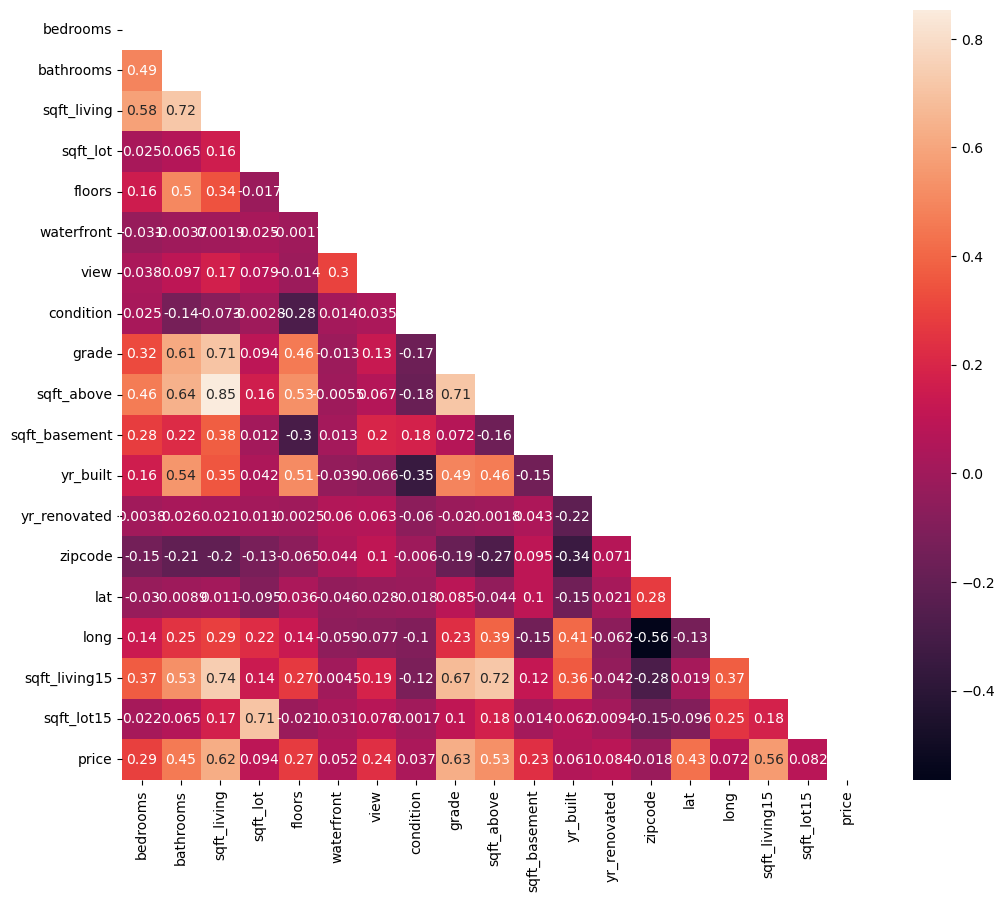

In [17]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

bedrooms


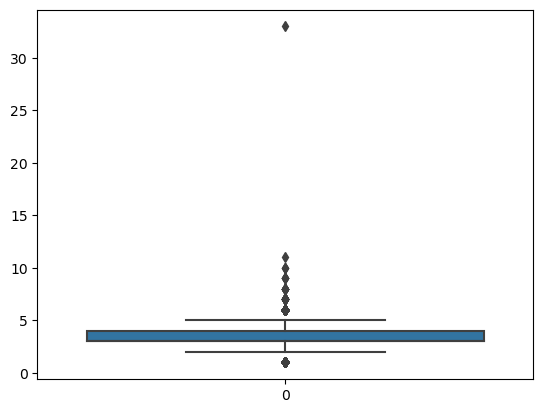

bathrooms


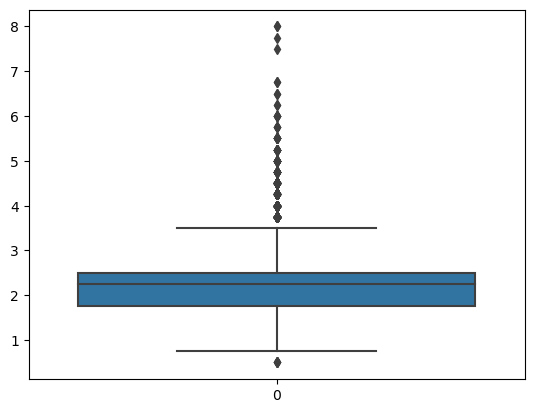

sqft_living


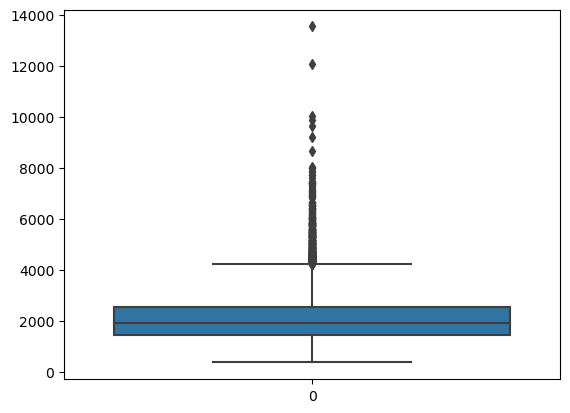

sqft_lot


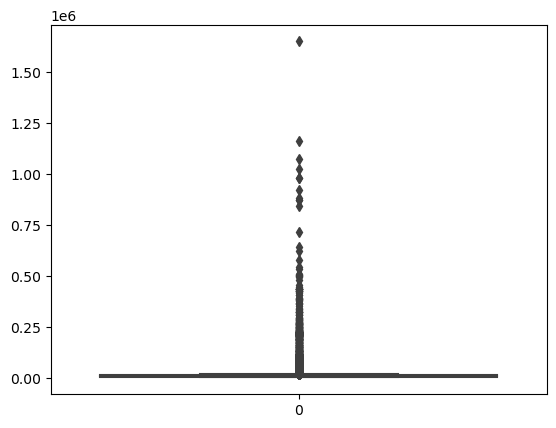

floors


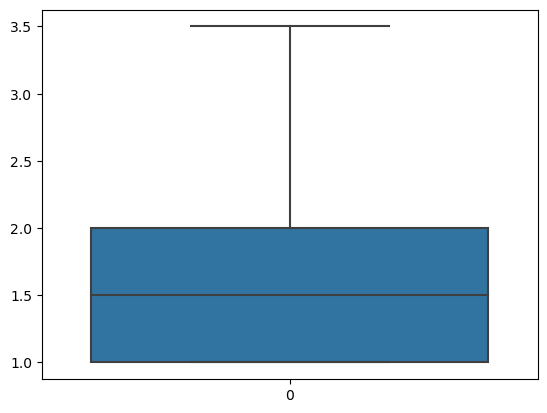

waterfront


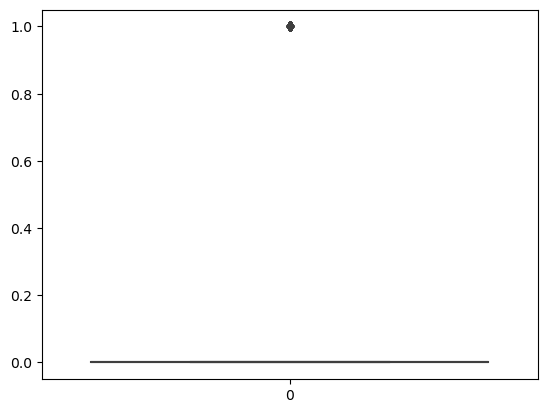

view


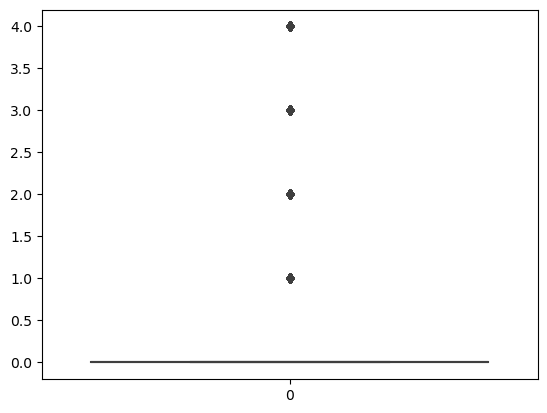

condition


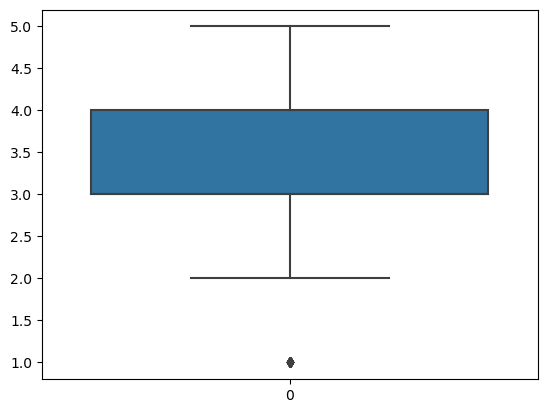

grade


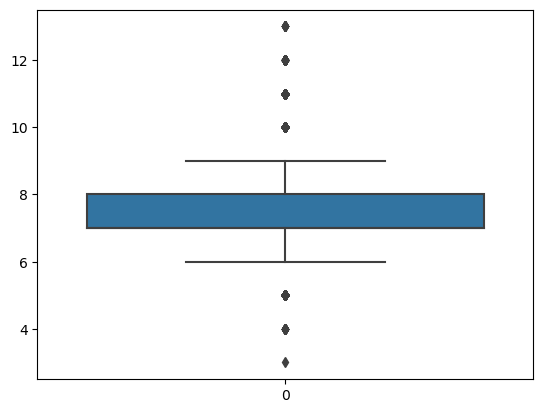

sqft_above


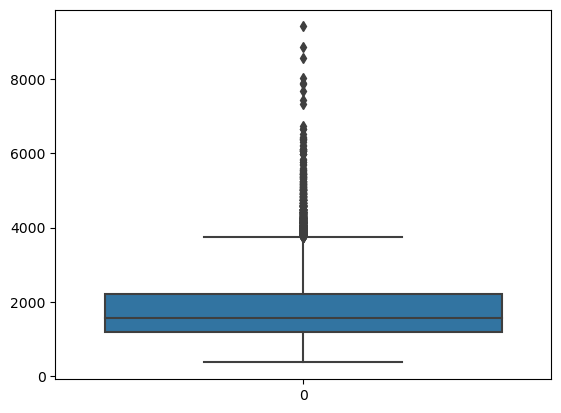

sqft_basement


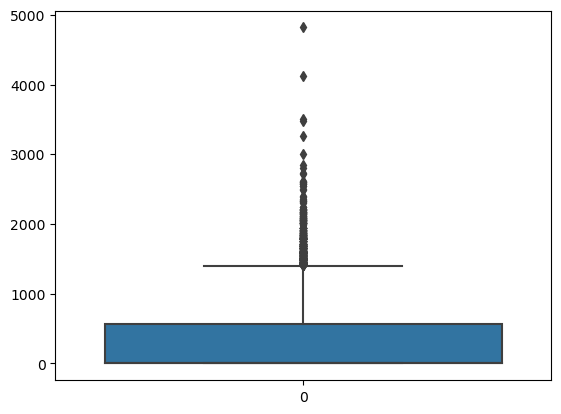

yr_built


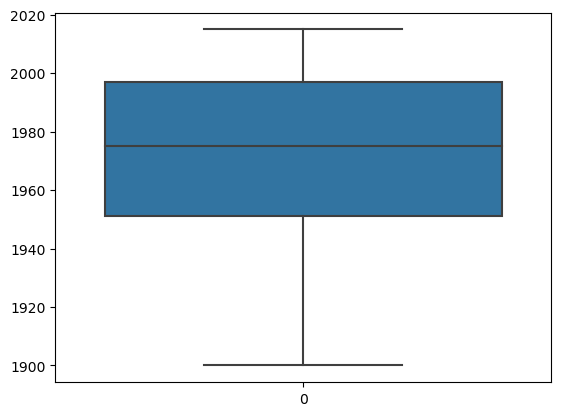

yr_renovated


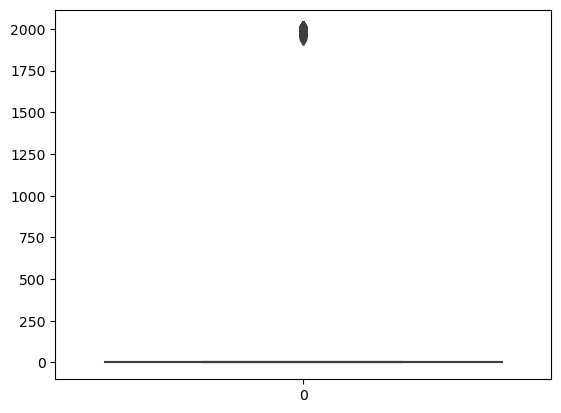

sqft_living15


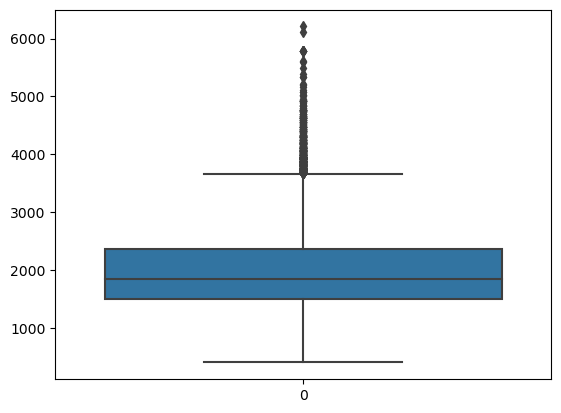

sqft_lot15


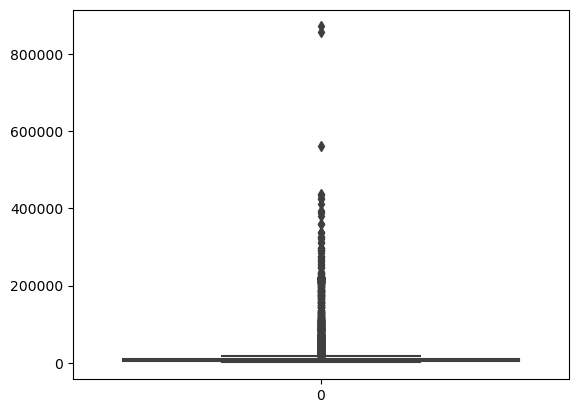

price


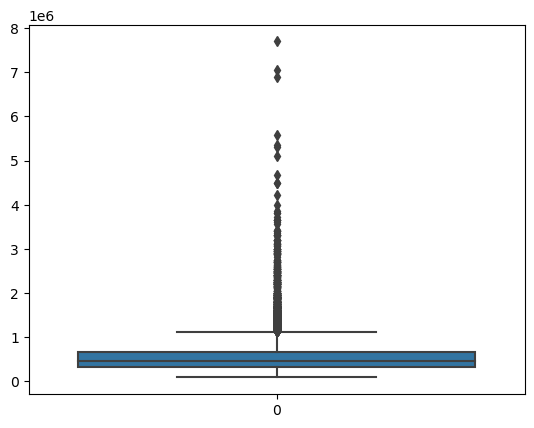

neighborhoods


KeyError: 'neighborhoods'

In [32]:
for col in df.columns:
    print(col)
    sns.boxplot(numerical[col])
    plt.show()

In [18]:
import numpy as np

# Assuming 'df' is your DataFrame with dummy encoded columns
# Apply log scaling to the entire dataset
data_log_scaled = df.applymap(lambda x: np.log(x) if isinstance(x, (int, float)) and x > 0 else x)

# Print the log-scaled dataset
print(data_log_scaled)


       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  view  \
0      1.098612   0.000000     7.073270  8.639411  0.000000         0.0   0.0   
1      1.098612   0.810930     7.851661  8.887653  0.693147         0.0   0.0   
2      0.693147   0.000000     6.646391  9.210340  0.000000         0.0   0.0   
3      1.386294   1.098612     7.580700  8.517193  0.000000         0.0   0.0   
4      1.098612   0.693147     7.426549  8.997147  0.000000         0.0   0.0   
...         ...        ...          ...       ...       ...         ...   ...   
21592  1.098612   0.916291     7.333023  7.030857  1.098612         0.0   0.0   
21593  1.386294   0.916291     7.745003  8.667852  0.693147         0.0   0.0   
21594  0.693147  -0.287682     6.927558  7.207860  0.693147         0.0   0.0   
21595  1.098612   0.916291     7.377759  7.778211  0.693147         0.0   0.0   
21596  0.693147  -0.287682     6.927558  6.981006  0.693147         0.0   0.0   

       condition     grade 

In [37]:
y = data_log_scaled['price']
X = data_log_scaled.drop(columns='price')

In [39]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
data_log_scaled['price'].value_counts()

In [ ]:
counts = data_log_scaled['price'].value_counts()
count_of_values_with_count_1 = 0
for val, count in counts.items():
    if count == 1:
        count_of_values_with_count_1 += 1
print(count_of_values_with_count_1)


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the log-scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train_std, y_train)

# Make predictions on the test set
predictions_std = lr.predict(X_test_std)

# Evaluate the model
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions_std, y_test))
print("RMSE:", mean_squared_error(predictions_std, y_test, squared=False))



R2: 0.7162957997910053
MAE: 0.18163543380845448
RMSE: 0.23364930229496392


In [32]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

lat              1.861275e-01
grade            1.470826e-01
yr_built         9.834768e-02
sqft_living15    7.200378e-02
sqft_living      6.925685e-02
sqft_above       6.143893e-02
view             4.037052e-02
condition        4.010168e-02
sqft_basement    3.780116e-02
floors           3.603843e-02
sqft_lot15       3.375056e-02
bathrooms        2.958527e-02
bedrooms         2.819894e-02
zipcode          1.843516e-02
sqft_lot         1.648315e-02
yr_renovated     1.065556e-02
long             4.796256e-04
waterfront       1.179612e-16
dtype: float64

In [35]:
X = data_log_scaled[data_importance[:17].index]  # data_final_outliers
y = data_log_scaled["price"]  # data_final_outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7177563995430867
MAE: 0.1810373366784046
RMSE: 0.23304707559834903


In [61]:
data_log_scaled.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'price', 'neighborhoods', 'zipcodes_categories_Outskirts',
       'zipcodes_categories_Suburb'],
      dtype='object')

In [36]:
data_log_scaled.drop(columns=['sqft_living'], inplace=True)


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif = add_constant(data_log_scaled.drop(columns=['price']))

# To remove multicolinearity automatically:
threshold = 10

while True:
    # calculates vif
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif

C:\Users\Tetiana\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,0
view,1.103667
yr_renovated,1.131602
lat,1.200980
condition,1.227366
zipcode,1.670943
bedrooms,1.753241
long,1.901249
sqft_basement,1.958321
floors,2.423837
yr_built,2.522454


,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.0,1.098612,0.000000,8.639411,0.000000,0.0,0.0,1.098612,1.945910,7.073270,0.000000,7.578145,0.000000,11.494537,3.860965,-122.257,7.200425,8.639411
1,1.0,1.098612,0.810930,8.887653,0.693147,0.0,0.0,1.098612,1.945910,7.682482,5.991465,7.576097,7.596392,11.493997,3.865372,-122.319,7.432484,8.941022
2,1.0,0.693147,0.000000,9.210340,0.000000,0.0,0.0,1.098612,1.791759,6.646391,0.000000,7.566828,0.000000,11.493008,3.865726,-122.233,7.908387,8.994917
3,1.0,1.386294,1.098612,8.517193,0.000000,0.0,0.0,1.609438,1.945910,6.956545,6.813445,7.583248,0.000000,11.494110,3.861168,-122.393,7.215240,8.517193
4,1.0,1.098612,0.693147,8.997147,0.000000,0.0,0.0,1.098612,2.079442,7.426549,0.000000,7.594381,0.000000,11.493478,3.863186,-122.045,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,1.098612,0.916291,7.030857,1.098612,0.0,0.0,1.098612,2.079442,7.333023,0.000000,7.605392,0.000000,11.493773,3.864917,-122.346,7.333023,7.319202
21593,1.0,1.386294,0.916291,8.667852,0.693147,0.0,0.0,1.098612,2.079442,7.745003,0.000000,7.607878,0.000000,11.494211,3.860955,-122.362,7.512071,8.881836
21594,1.0,0.693147,-0.287682,7.207860,0.693147,0.0,0.0,1.098612,1.945910,6.927558,0.000000,7.605392,0.000000,11.494191,3.862715,-122.299,6.927558,7.604396
21595,1.0,1.098612,0.916291,7.778211,0.693147,0.0,0.0,1.098612,2.079442,7.377759,0.000000,7.602900,0.000000,11.492998,3.861456,-122.069,7.251345,7.160069


In [42]:
[col for col in data_log_scaled.columns if col not in vif]

['price']

In [43]:
# Manually, just to see what the code is doing:

vif_ = pd.DataFrame(index=vif.columns)

vif_["VIF Factor"] = [round(variance_inflation_factor(np.array(vif), i),2)
                     for i in range(len(vif.columns))]

vif_.sort_values("VIF Factor")

C:\Users\Tetiana\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF Factor
view,1.100000e+00
yr_renovated,1.130000e+00
lat,1.200000e+00
condition,1.230000e+00
zipcode,1.670000e+00
bedrooms,1.750000e+00
long,1.900000e+00
sqft_basement,1.960000e+00
floors,2.420000e+00
yr_built,2.520000e+00


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your feature matrix and target vector, respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Fit the model to the training data
rf_regressor.fit(X_train_std, y_train)

# Make predictions on the test data
predictions = rf_regressor.predict(X_test_std)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.02613551622618083
Mean Absolute Error: 0.11483442745543279
R-squared: 0.8641787036853722


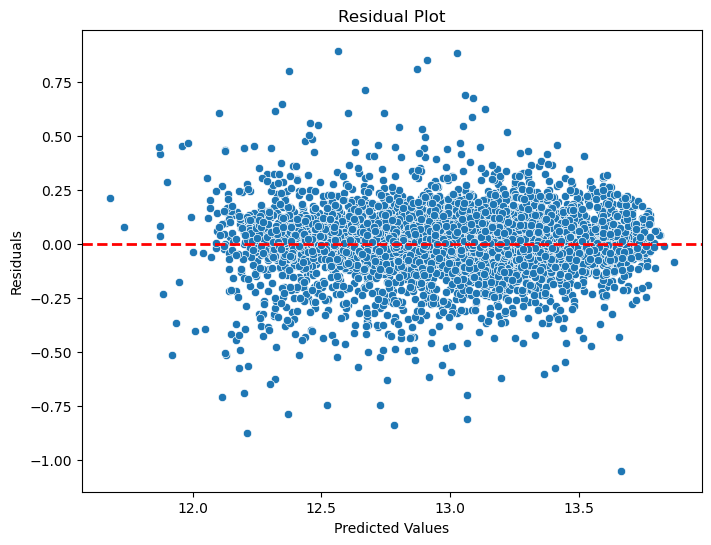

In [48]:
#Plotting the residuals
predicted_values = rf_regressor.predict(X_test_std)
residuals = y_test - predicted_values
# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In this residual plot, the points are scattered randomly around the residual=0 line. We can conclude that a linear model is appropriate for modeling this data.

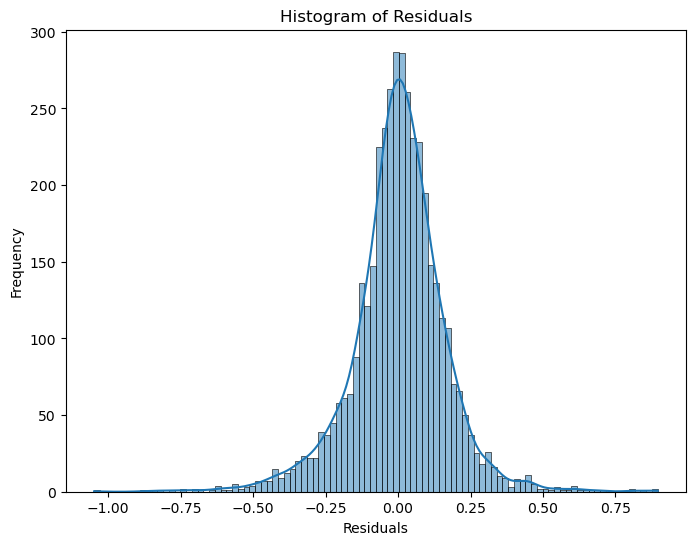

In [49]:
#Plotting a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

We can see normaly destributed residuals - it means that our model works good.

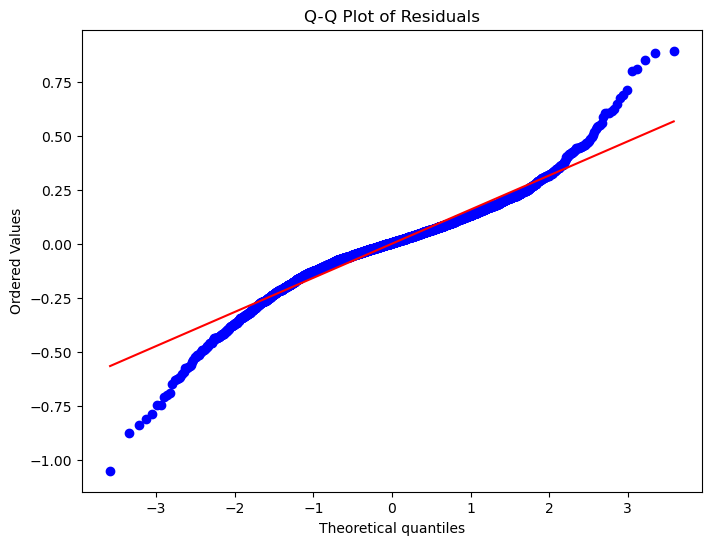

In [52]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'residuals' is your array of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Our data close to 45 degree line - we can conclude that our data normaly destributed.

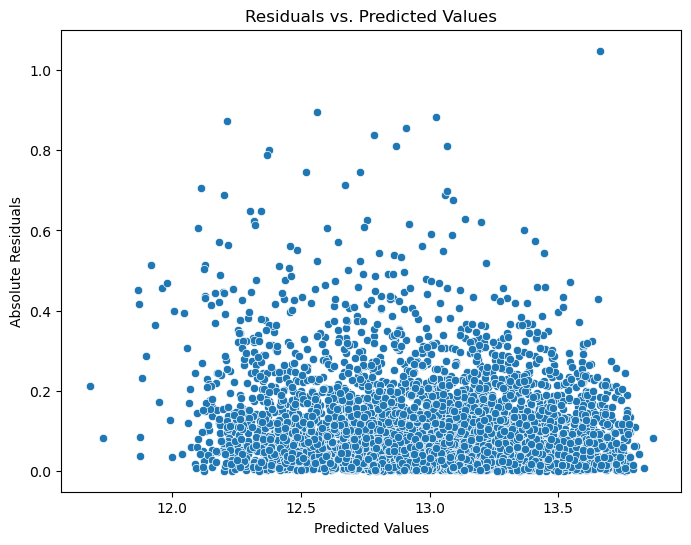

In [53]:
#Plotting the residuals vs the predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=np.abs(residuals))
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.show()

We can see random destribution of the data. 

In [45]:
# Try different values for n_estimators
n_estimators_list = [50, 100, 150, 200]

for n_estimators in n_estimators_list:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    predictions = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("n_estimators:", n_estimators)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)


n_estimators: 50
Mean Squared Error: 0.026627618176164124
Mean Absolute Error: 0.11570485285697496
R-squared: 0.8616213436475119
n_estimators: 100
Mean Squared Error: 0.026386795459412152
Mean Absolute Error: 0.11519987856153625
R-squared: 0.8628728534048932
n_estimators: 150
Mean Squared Error: 0.02622503991388498
Mean Absolute Error: 0.11497102695473746
R-squared: 0.8637134661438745
n_estimators: 200
Mean Squared Error: 0.02613636658449566
Mean Absolute Error: 0.11484309748366346
R-squared: 0.8641742845352911


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ExtraTreesRegressor model
extra_trees_model = ExtraTreesRegressor(n_estimators=200, random_state=42)

# Train the model
extra_trees_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = extra_trees_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.026524596555291338
Mean Absolute Error: 0.11469978709378079
R-squared: 0.8621567273749379


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are your feature matrix and target vector, respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
predictions = gbm.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.026564083793559297
Mean Absolute Error: 0.11879786965585876
R-squared: 0.8619515197240529


In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor(n_estimators=200, random_state=42)

# Train the model
ada_boost_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = ada_boost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.09791800370793811
Mean Absolute Error: 0.26099682287937614
R-squared: 0.49113879821396933


In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target vector, respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength using the alpha parameter

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
predictions = ridge.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("R2:", ridge.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions_std, y_test))
print("Mean Squared Error:", mse)


R2: -667.5239834688639
MAE: 0.1810373366784046
Mean Squared Error: 0.08095925853076001


C:\Users\Tetiana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X and y are your feature matrix and target vector, respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength using the alpha parameter

# Fit the model to the training data
lasso.fit(X_train_std, y_train)

# Make predictions on the test data
predictions = lasso.predict(X_test_std)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("R2:", lasso.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("Mean Squared Error:", mse)


R2: -1.9974977754300127e-05
MAE: 0.3580983746946298
Mean Squared Error: 0.19242960413212631
